# An Effective Way to Classify Complex Pattern


1. Problem Statement/Task/Abstract<br>
2. Introduction<br>
3. Data(Half Moon or Spiral)<br>
4. Plot Data<br>
5. Add noise from uniform or normal distribution<br>
6. Choose test data region and plot<br>
7. Training SVM and check result variations for different kernel<br>
8. Training MLP and check result variation<br>
9. Analysis of Results<br>
10. Conclusion<br>


### 1. Problem Statement/Task/Abstract:<br>
The spiral and half moons task is a well-known benchmark for binary classification. The
data consist of points on two intertwined spirals or half moons which cannot be linearly
separated. __This notebook reviews how this task have significantly inspired the development of
several important methods in the history of Support Vector Machine and Multilayer
Perceptron(MLP)__.<br>
These task became popular for several different reasons:<br>
1) These structures are one of the most difficult patterns to classify;<br>
2) It belonged to a suite of standard benchmark tasks;<br>
3) It had visual appeal and was convenient to use in pilot studies and etc.<br>


### 2. Introduction:<br>
Spiral and Half moons data are found in several natural and physical domains. The classic
double helix DNA, the motion of particles in cyclotrons, spiral feed in manufacturing, spiral
galaxies and financial stocks are some of the well-known examples. Also these task or their
variations were frequently employed in pilot studies or studies with a non-experimental
focus which were primarily interested in a quick and uncomplicated test or evaluation of
their method.<br><br>
We use Kernel-based methods like Support Vector Machines (SVM) and Multilayer
Perceptron(MLP) those are the most popular machine learning techniques for solving
complex classification tasks. These techniques are capable of handling nonlinear mappings
from the input space to the function (solution) space and dealing with non-stationary data.

In [1]:
#libraries
import sys
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics  import confusion_matrix ,accuracy_score,precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.neural_network import MLPClassifier 
import numpy
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

## 3. Data
We will use the typical half moon and spiral data sets available inside sklearn datasets. The two different colors
in both the data sets are indicating two classes in the data set.

### Select option to create Half Moon or Spiral data

In [36]:
def twospirals(n_points, noise= 0.12):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 750 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

choice_of_data = input("Select and type ENTER \n\t 1. Half Moons :  \n\t 2. Spiral :\n")
if choice_of_data == '1':   
    print("############# Half Moons Data Created ###################\n")
    # HALFMOON DATA : ADD RANDOM NOISE 0.12 Then WE WILL ADD MANUAL NOISE
    x, y = datasets.make_moons(n_samples=2000, noise=.12, random_state=0) #Please specify noise here
elif choice_of_data=='2':
    print("############# Spiral Data Created###################\n")
    # SPIRAL DATA : ADD RANDOM NOISE 0.12 Then WE WILL ADD MANUAL NOISE
    x, y = twospirals(500)
else:
    print("#################  WRONG INPUT .(EXIT)  ######################")
if choice_of_data in ['1','2']:
    label = y.tolist()
    x_0 = []
    x_1 = []
    for i in x :
        x_0.append(i[0])
        x_1.append(i[1])

Select and type ENTER 
	 1. Half Moons :  
	 2. Spiral :
1
############# Half Moons Data Created ###################



## 4. Plot Data

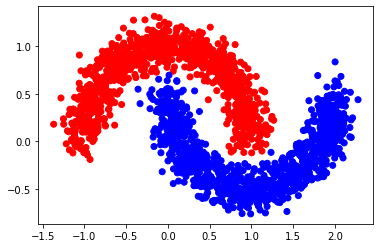

In [37]:
color= ['red' if i == 0 else 'blue' for i in label]
plt.scatter(x_0, x_1, color = color)
plt.show()

## 5. Add noise from uniform or normal distribution

__Now lets make it more complex.__<br>
we add sufficient noise(Normal or Uniform) randomly to the original shapes of the
individual data sets where we can choose the test data from a particular portion of the
shape. Her we will take 200 noisy point. Later this number can be tuned.

In [38]:
#use sub function to the parts those are called multiple times-> future task
def add_noise(m, n, label):
    label_new = label
    color= ['red' if i == 0 else 'blue' for i in label]
    plt.scatter(m, n, color = color)
    plt.title("Original Data")
    plt.show()
    ch = input("\n\t 1. UNIFORM :  \n\t 2. NORMAL :\n")
    if ch == '1':   
            print("############# UNIFORM NOISE ###################\n")
            choice = input(" \n\t 1. NOISE OF LABEL 1--BLUE :.  \n\t 2. NOISE OF LABEL 0--RED : \n\t 3. BOTH : \n")
            if choice == '1':
                print('\n################# OPTION 1 : CLASS 1(BLUE) ################')
                print('\nEnter lower range for X axis  :')
                xlow = float(input()) 
                print('\nEnter upper range for X axis  :')
                xhigh = float(input())
                print('\nEnter lower range for Y axis  :')
                ylow = float(input())
                print('\nEnter upper range for Y axis  :') 
                yhigh = float(input())
                normx = numpy.random.uniform(xlow, xhigh, size=(200,1))
                normy = numpy.random.uniform(ylow, yhigh, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(1)

                color1= ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding uniform noise in blue class")
                plt.show()
                return m,n, label_new
            elif choice == '2':
                print('\n################# OPTION 2 : CLASS 0(RED) ################')
                print('\nEnter lower range for X axis  :')
                xlow = float(input()) 
                print('\nEnter upper range for X axis  :')
                xhigh = float(input())
                print('\nEnter lower range for Y axis  :')
                ylow = float(input())
                print('\nEnter upper range for Y axis  :') 
                yhigh = float(input())
                normx = numpy.random.uniform(xlow, xhigh, size=(200,1))
                normy = numpy.random.uniform(ylow, yhigh, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(0)

                color1 = ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding uniform noise in red class")
                plt.show()
                return m,n, label_new

            elif choice == '3':
                print("############ OPTION 3 : BOTH CLASS #############")
                print("\n===== FOR CLASS 1(BLUE) ==========")
                print('\nEnter lower range for X axis  :')
                xlow = float(input()) 
                print('\nEnter upper range for X axis  :')
                xhigh = float(input())
                print('\nEnter lower range for Y axis  :')
                ylow = float(input())
                print('\nEnter upper range for Y axis  :') 
                yhigh = float(input())
                normx = numpy.random.uniform(xlow, xhigh, size=(200,1))
                normy = numpy.random.uniform(ylow, yhigh, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(1)
                print("\n===== FOR CLASS 0(RED) ==========")
                print('\nEnter lower range for X axis  :')
                xlow = float(input()) 
                print('\nEnter upper range for X axis  :')
                xhigh = float(input())
                print('\nEnter lower range for Y axis  :')
                ylow = float(input())
                print('\nEnter upper range for Y axis  :') 
                yhigh = float(input())
                normx = numpy.random.uniform(xlow, xhigh, size=(200,1))
                normy = numpy.random.uniform(ylow, yhigh, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(0)
                color1 = ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding uniform noise in both classes")
                plt.show()
                return m,n, label_new
            else:
                print("#################  WRONG INPUT .(EXIT)  ######################")
                sys.exit()
    elif ch=='2':
            print("############# NORMAL NOISE ###################\n")
            choice = input(" \n\t 1. NOISE OF LABEL 1--BLUE :.  \n\t 2. NOISE OF LABEL 0--RED : \n\t 3. BOTH : \n")
            if choice == '1':
                print('\nEnter mean for x and y for CLASS 1(BLUE) :')
                xmean = float(input()) # 1
                ymean = float(input()) # 0.25
                print('\nEnter variance for CLASS 1(BLUE) :')
                sd = float(input()) # 0.2  

                normx = numpy.random.normal(loc=xmean, scale=sd, size=(200,1))
                normy = numpy.random.normal(loc=ymean, scale=sd, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(1)

                color1= ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding normal noise in blue class")
                plt.show()
                return m,n, label_new
            elif choice == '2':
                print('\nEnter mean for x and y for CLASS 0(RED) :')
                xmean = float(input()) # 1
                ymean = float(input()) # 0.25
                print('\nEnter variance for CLASS 0(RED) :') 
                sd = float(input())
                normx = numpy.random.normal(loc=xmean, scale=sd, size=(200,1))
                normy = numpy.random.normal(loc=ymean, scale=sd, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(0)
                    #print(len(label_new))
                    #print(label_new)
                color1 = ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding normal noise in red class")
                plt.show()
                return m,n, label_new

            elif choice == '3':
                print('\nEnter mean for x and y for CLASS 1(BLUE) :')
                xmean = float(input()) # 1
                ymean = float(input()) # 0.25
                print('\nEnter variance for CLASS 1(BLUE) :') 
                sd = float(input())
                normx = numpy.random.normal(loc=xmean, scale=sd, size=(200,1))
                normy = numpy.random.normal(loc=ymean, scale=sd, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(1)
                print('\nEnter mean for x and y for CLASS 0(RED) :')
                xmean1 = float(input()) # 1
                ymean1 = float(input()) # 0.25
                print('\nEnter variance for CLASS 0(RED) :') 
                sd1 = float(input())
                normx = numpy.random.normal(loc=xmean1, scale=sd1, size=(200,1))
                normy = numpy.random.normal(loc=ymean1, scale=sd1, size=(200,1))
                for i in range(len(normx)):
                    m.append(normx[i][0])
                    n.append(normy[i][0])
                    label_new.append(0)

                color1 = ['red' if i == 0 else 'blue' for i in label_new]
                plt.scatter(m, n, color=color1)
                plt.title("Data after adding normal noise in both classes")
                plt.show()
                return m,n, label_new

            else:
                print("#################  WRONG INPUT .(EXIT)  ######################")
                sys.exit()
    else:
        print("#################  WRONG INPUT .(EXIT)  ######################")
        sys.exit()


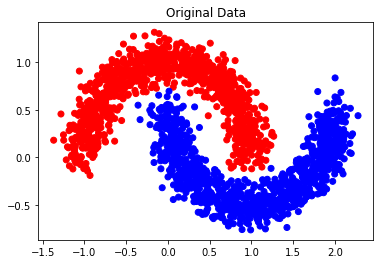


	 1. UNIFORM :  
	 2. NORMAL :
2
############# NORMAL NOISE ###################

 
	 1. NOISE OF LABEL 1--BLUE :.  
	 2. NOISE OF LABEL 0--RED : 
	 3. BOTH : 
1

Enter mean for x and y for CLASS 1(BLUE) :
0.5
0.5

Enter variance for CLASS 1(BLUE) :
0.1


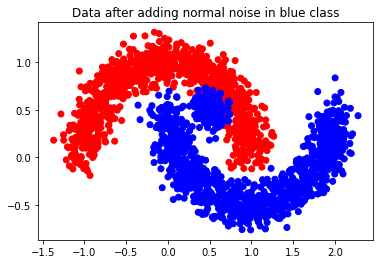

In [40]:
x_axis, y_axis, label = add_noise(x_0, x_1, label) #commet this if you don't want to add extra noise 
#x_axis, y_axis, label = x_0, x_1, label #uncommet this if you don't want to add extra noise 

In [41]:
data = []
for a, b in zip(x_axis, y_axis):
    data.append([a,b])

In [42]:
#Train test split
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(data, label, train_size=0.7, stratify=label)
a1 = []
b1 = []
for i in X_train :
    a1.append(i[0])
    b1.append(i[1])

### If someone wanted to choose the critical rigions as test data. 

## 6. Choose test data region and plot

========  TRAIN DATA  =============


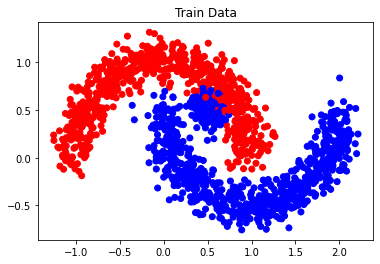

GIVE Y AXIS LOWER RANGE
0
GIVE Y AXIS UPPER RANGE
1
========  TEST DATA  =============


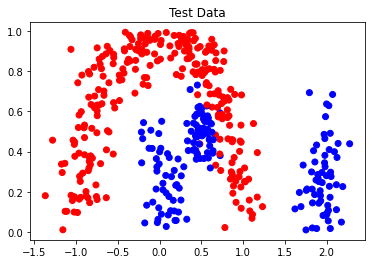

In [43]:
print("========  TRAIN DATA  =============")
color2= ['red' if i == 0 else 'blue' for i in Y_train]
plt.scatter(a1, b1, color=color2)
plt.title("Train Data")
plt.show() 


print("GIVE Y AXIS LOWER RANGE")
s1 = float(input())
print("GIVE Y AXIS UPPER RANGE")
s2 = float(input())
X_test_final = []
Y_test_final = []
for i in range(len(X_test)):
    if X_test[i][1] > s1 and X_test[i][1] < s2:
        Y_test_final.append(Y_test[i])
        X_test_final.append(X_test[i])

    
print("========  TEST DATA  =============")
a4=[]
b4=[]
for i in X_test_final :
    a4.append(i[0])
    b4.append(i[1])

color2= ['red' if i == 0 else 'blue' for i in Y_test_final]
plt.title("Test Data")
plt.scatter(a4, b4, color=color2)
plt.show()

## 7. Training SVM and check result variation for different kernel

CHOOSE KERNEL FOR SVM :

	 1. LINEAR :  
	 2. RBF :
	 3. POLYNOMIAL :
2
Best_estimator :  SVC(C=1.7000000000000006)
 
Micro Averaged result::

 Precision:0.9814814814814815

 Recall:0.9814814814814815

 F-measure:0.9814814814814815

========= TEST DATA AND  RESULTING HYPERPLANE =========


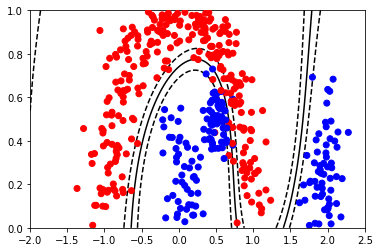

CPU times: total: 3.41 s
Wall time: 5.43 s


In [44]:
%%time
list_C = np.arange(1, 2, 0.05)#
print("CHOOSE KERNEL FOR SVM :")
cho=input("\n\t 1. LINEAR :  \n\t 2. RBF :\n\t 3. POLYNOMIAL :\n")
if cho == '1':
    k = 'linear'
elif cho == '2':
    k ='rbf'## Training SVM
elif cho == '3':
    k = 'poly'
else:
    print("WRONG INPUT -- (EXIT)")
    sys.exit()
clf = svm.SVC(kernel=k)
parameters = {
        'C':list_C,
        }

svm_clf = GridSearchCV(clf, parameters, cv=5, scoring='f1_micro')
svm_clf.fit(X_train,Y_train)


svm_clf_b = svm_clf.best_estimator_
print("Best_estimator : ",svm_clf.best_estimator_)

pred = svm_clf_b.predict(X_test_final)
pred = list(pred)
"SCORE "
#print(accuracy_score(pred,y_test_new))   
print(' \nMicro Averaged result::')
#print ('\n Confusion Matrix \n')
#print (confusion_matrix(pred,y_test_new))
pr=precision_score(pred, Y_test_final, average='micro')
print ('\n Precision:' + str(pr))
re=recall_score(pred, Y_test_final, average='micro')
print ('\n Recall:' + str(re))
fm=f1_score(pred, Y_test_final, average='micro') 
print ('\n F-measure:' + str(fm))      

"PRINT HYPERPLANE "
if choice_of_data == '2':
    x_min = -13
    x_max = 13
if choice_of_data == '1':
    x_min = -2
    x_max = 2.5
    
y_min = s1
y_max = s2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm_clf_b.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)   
print("\n========= TEST DATA AND  RESULTING HYPERPLANE =========")
color= ['red' if i == 0 else 'blue' for i in Y_test_final]
plt.scatter(a4, b4, color=color,zorder=10, cmap=plt.cm.Paired)
#        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


plt.show()

## 8. Training MLP and check result variation

 

 Micro Averaged result


 Precision:0.9722222222222222

 Recall:0.9722222222222222

 F-measure:0.9722222222222222

===========   TEST DATA AND  RESULTING HYPERPLANE  =========


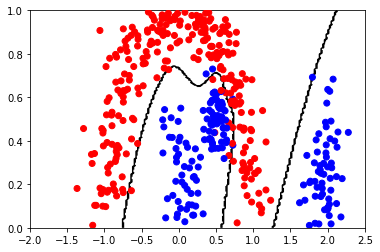

CPU times: total: 531 ms
Wall time: 530 ms


In [45]:
%%time
#solver = relu/lbfgs
clf = MLPClassifier(activation='logistic' , solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15, 2), random_state=1)
clf.fit(X_train,Y_train)

pred = clf.predict(X_test_final)
pred = list(pred)
#print(accuracy_score(pred,y_test_new))   
print(' \n\n Micro Averaged result\n')
#print ('\n Confusion Matrix \n')
#print (confusion_matrix(pred,y_test_new))
pr = precision_score(pred,Y_test_final, average='micro')
print ('\n Precision:'+str(pr))
re = recall_score(pred,Y_test_final, average='micro')
print ('\n Recall:'+str(re))
fm = f1_score(pred,Y_test_final, average='micro') 
print ('\n F-measure:'+str(fm))      

#        print("Best_estimator :")
#        print (clf.best_estimator_)

"PRINT HYPERPLANE "
if choice_of_data == '2':
    x_min = -13
    x_max = 13
if choice_of_data == '1':
    x_min = -2
    x_max = 2.5
    
y_min = s1
y_max = s2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]


Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

print("\n===========   TEST DATA AND  RESULTING HYPERPLANE  =========")
color= ['red' if i == 0 else 'blue' for i in Y_test_final]
#   RUN THE NEXT TWO COMMANDS TOGETHER
plt.scatter(a4, b4, color=color,zorder=10, cmap=plt.cm.Paired)
#        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


plt.show()


## 9. Analysis of Results
In this research work, we evaluated the performance of MLP of different
activation function and different solver and of different kernels for SVM. The
performances of the different approach has been observed on the basis of
their accuracy in terms of false positive rate, precision and f-measure.<br>
1. For both dataset RBF kernel performs better than linear and polynomial kernel.<br>
2. The results indicate that the performance of the SVM classification depends mainly on the types of kernels and parameters.<br>
3. For non linear problems its better to avoid linear SVM as it is unable to separate two classes by a hyperplane.<br>
4. If we add Normal noise instead of Uniform noise randomly to a dataset then it is more harder for the classifier to classify the dataset properly.<br>
5. If we increase the noise or overlap them with their opposite classes, then the performance of the classifier will decrease.<br>
6. In case of MPL we can say that for both dataset activation function “relu” and solver “lbfgs” is more suitable for classify complex structured data.<br>
8. For Halfmoon data set best performer is MLP and for spiral data best performer is SVM with RBF kerenl(compared by F- Measure)

## 10. Conclusion
In this notebook, spiral and half moons structures have been classified using the MLP and SVM
using kernels. We have seen how noise can affect the data classification and how to avoid
that using nonlinear mappings.<br>
We believe that for future studies into complex binary classification, the methods and
findings of this source will be useful.

In [35]:
#End